<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Python%ED%95%B4%EC%84%9D%EC%97%AD%ED%95%99_018_Fowles_C10_2_Brachistochrone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical Mechanics with Python
# 파이썬으로 코딩하는 해석역학
## <Elective Tracks 2024 Summer Programme>

Fowles, Analytical Mechanics, 7th ed.
-----------------------------
## Computer Problems

### C 10.2

 구슬이$xy$ 평면 속의 매끄러운 곡선  $S$ 를 따라 점 $(0,2)$ 에서 점  $(\pi, 0)$로 미끄러져 내려간다.

 <img src='https://drive.google.com/uc?export=download&id=1ksT1F3w-oFUWFlT94BK9Iw2w0xXuDtbc' width="500" height ="" />

 모든 마찰과 공기 저항을 무시할 때 구슬이 내려가는 시간이 가장 짧은 곡선의 모양은?



### (a) 가장 시간이 적게 걸리는 곡선* 은 사이클로이드임을 증명하시오.

 \* "최속강하선", brachistochrone (< "βράχιστος"(가장 짧은) + "χρόνος"(시간))


<img src='https://drive.google.com/uc?export=download&id=1wwrPnskviH76WrqFNnWAo_6AAgUVVYAA' width="400" height ="" />


경로 위의 극히 짧은 경로 요소는 $$ \begin{align}
ds &=\sqrt{dx^2+dy^2} = \sqrt{1 + \left(\frac{dy}{dx}\right)^2}dx\\
&= \sqrt{1+y'^2}dx
\end{align}
$$

이고, 이 경로 요소를 지나는 순간의 속력이 $v$일 때, $ds$를 지나는 시간 $dt$는

$$ dt = \frac{ds}{v} $$ 이다.

정지 상태에서 출발했다면 높이 $y$ 에서의 속력은 역학적 에너지 보존에 의해

$$ v = \sqrt{2g(2-y)}$$

이다. 여기서 $g$는 중력 가속도이다. 따라서 시간 요소 $dt$는

$$ dt = \sqrt \frac{1 + y'^2}{2g(2-y)}dx $$

이고, 전체 운동 시간은

$$ t = \frac{1}{\sqrt{2g}}\int_0^\pi \sqrt \frac{1 + y'^2}{2-y}dx $$

이다.

여기서

$$f(y, y'; x) = \sqrt \frac{1 + y'^2}{2-y}$$

라 하면, $f$는 변분 $\delta y$에 대해 $t$의 값을 극소 또는 극대로 만드는 라그랑주 방정식

$$ \frac{\partial f}{\partial y} - \frac{d}{dt}\frac{\partial f}{\partial y'} = 0 $$

를 만족해야 한다.

$$\frac{\partial f}{\partial y} = \frac{\sqrt{1+y'^2}}{(2-y)^{3/2}},$$

$$\frac{\partial f}{\partial y'} = \frac{y'}{\sqrt{1+y'^2}\sqrt{2-y}},$$

$$\frac{d}{dx}\frac{\partial f}{\partial y'}=\frac{y''(2-y)+\frac{1}{2}(1+y'^2)}{(1+y'^2)^{3/2}(2-y)^{3/2}}.$$

으로부터 라그랑주 방정식은

$$\frac{\partial f}{\partial y}-\frac{d}{dx}\frac{\partial f}{\partial y'} = \frac{(1+y'^2)-2y''(2-y)}{2(1+y'^2)^{3/2}(2-y)^{3/2}}=0$$

이고, 여기서 분자가 $0$이어야 하므로, $y(x)$는 비선형 2차 미분 방정식

$$ y'' = \frac{1+y'^2}{2(2-y)} $$

을 만족해야 한다.

* 두 점 $(0, 2)$, $(\pi, 0)$을 잇는 사이클로이드

$$\left\{
  \begin{align}
  x &= \theta - \sin\theta \\
  y &= 1 + \cos\theta
  \end{align}
\right.$$

에 대해

$$ y' = \frac{dy}{dx} = \frac{dy}{d\theta}\frac{d\theta}{dx} = \frac{dy/d\theta}{dx/d\theta} = -\frac{\sin\theta}{1 - \cos\theta},$$

$$ 1 + y'^2 = \frac{(1-\cos\theta)^2 + \sin^2\theta}{(1-\cos\theta)^2} = \frac{2}{1-\cos\theta}$$

이고,

$$ y'' = \frac{dy'}{dx}=\frac{dy'/d\theta}{dx/d\theta} = \frac{1}{(1-\cos\theta)^2}, $$

$$ 2 - y = 1 - \cos\theta $$

이므로,

$$ \frac{1+y'^2}{2(2-y)} = \frac{2}{1-\cos\theta}\frac{1}{2(1-\cos\theta)} = \frac{1}{(1-\cos\theta)^2} = y''$$

으로 $y(x)$는 위 미분 방정식을 만족한다. 따라서 사이클로이드가 연직면상의 두 점 사이를 가장 빠르게 미끄러져 내려가는 곡선, 즉 **최속강하선**(brachistochrone)임을 알 수 있다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# gaussian quadrature
from scipy.integrate import quad

In [ ]:
sym.init_printing()

### (b) 이차 함수 근사

곡선 S를 $y(x) = a_0 + a_1 x + a_2 x^2$ 로 근사하는 경우:

$y(0) = a_0 = 2$,

및

$y(\pi)=a_0 + a_1 \pi + a_2 \pi^2 = 0$ 에서,

$a_2 = - \dfrac{2+\pi a_1}{\pi^2}$

이다. 따라서 $a_1$에 대해서 최적화를 진행한다.

In [ ]:
x, g, a0, a1, a2 = sym.symbols("x g a0 a1 a2")

In [ ]:
a0 = 2
pi = sym.pi

In [ ]:
a2 = - (2 + a1*pi) / (pi**2)
a2

-π⋅a₁ - 2
─────────
    2    
   π     

경로 요소는

$$ds = \sqrt{dx^2 + dy^2} = \sqrt{ 1 + {y^{\prime}}^{2} } dx$$

경과시간 요소는

$$dt = \dfrac{ds}{v} = \dfrac{\sqrt{ 1 + {y^{\prime}}^{2} }}{\sqrt{2g(2-y)}} dx$$

이고, 따라서 전체 운동 시간은

$$ t = \dfrac{1}{\sqrt{2g}} \int_0^\pi \sqrt{\dfrac{1+{y^{\prime}}^{2}}{2-y}} dx $$

이므로

$$ f(y, y^{\prime};t) = \sqrt{\dfrac{1+{y^{\prime}}^{2}}{2-y}} $$

라 하면 시간이 극소가 되는 $f$는

$$ \dfrac{\partial f}{\partial y}- \dfrac{d}{dt} \left( \dfrac{\partial f}{\partial y^{\prime}} \right) = 0$$을 만족해야 한다.

In [ ]:
y = a0 + a1 * x + a2 * x**2
yf = sym.lambdify((x, a1), y)
y

        2                
       x ⋅(-π⋅a₁ - 2)    
a₁⋅x + ────────────── + 2
              2          
             π           

$ y^{\prime} = \dfrac{dy}{dx} = a_1 + 2 a_2 x $

In [ ]:
yd = sym.diff(y, x)
yd

     2⋅x⋅(-π⋅a₁ - 2)
a₁ + ───────────────
            2       
           π        

$f = \sqrt{\dfrac{1+(y^{\prime})^2}{2-y}}$

In [ ]:
f = sym.sqrt((1+yd**2)/(2-y))
f

            _____________________________
           ╱                       2     
          ╱  ⎛     2⋅x⋅(-π⋅a₁ - 2)⎞      
         ╱   ⎜a₁ + ───────────────⎟  + 1 
        ╱    ⎜            2       ⎟      
       ╱     ⎝           π        ⎠      
      ╱      ─────────────────────────── 
     ╱                  2                
    ╱                  x ⋅(-π⋅a₁ - 2)    
   ╱           -a₁⋅x - ──────────────    
  ╱                           2          
╲╱                           π           

$$ t = \dfrac{1}{\sqrt{2g}} \int_0^\pi f dx $$

In [ ]:
'''
f/sqrt(2g)를 계산 가능한 함수로 만들어준다.
'''
ffun = sym.lambdify((x, g, a1), f/sym.sqrt(2*g))

In [ ]:
'''
적당한 범위의 a1 값 목록을 만들어준다.
경로가 오른쪽 아래로 내려가야 하므로 음의 값으로 제한하고,
직선 경로의 경사각 -2/pi ~ -0.6366 을 포함하는 조금 넓은 범위를 잡아준다.
'''
a1s = np.linspace(-4,0,41)

In [ ]:
'''
수치 적분으로 각각의 a1 값에 대한 여행시간을 구한다.
'''

grav = 9.8;
Ts = np.array([quad(ffun,0,np.pi,args=(grav, a)) for a in a1s]).T[0];

<ipython-input-11-a3de5d5643e5>:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Ts = np.array([quad(ffun,0,np.pi,args=(grav, a)) for a in a1s]).T[0];


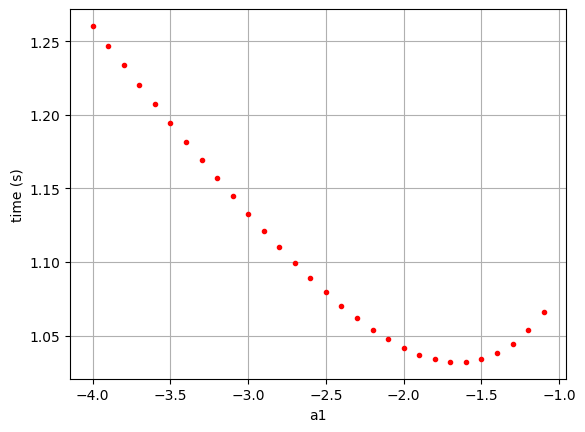

In [ ]:
plt.grid()
plt.xlabel("a1")
plt.ylabel("time (s)")
plt.plot(a1s[:30], Ts[:30],"r.")

In [ ]:
'''
t(a1)의 근사 다항식
'''
tc = np.polyfit(a1s[:36],Ts[:36],20)
tf = np.poly1d(tc)

'''
근사 다항식의 도함수
'''
td = np.polyder(tc)

<ipython-input-13-f879133bdfa7>:4: RankWarning: Polyfit may be poorly conditioned
  tc = np.polyfit(a1s[:36],Ts[:36],20)


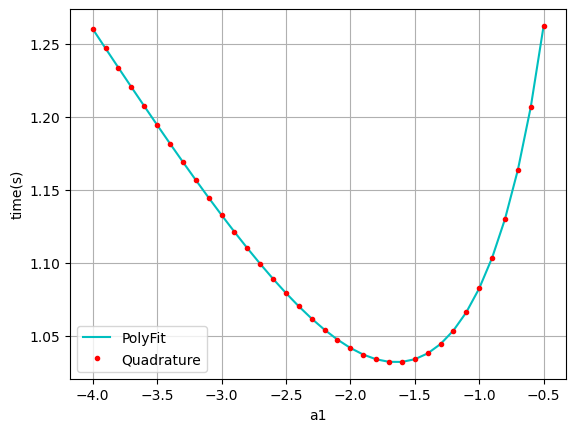

In [ ]:
'''
근사 다항식의 모습이 적분으로 구한 데이타를 잘 대표할 수 있는지 확인을 위해 그래프를 그려 비교해 본다:
'''
plt.grid()
plt.xlabel("a1")
plt.ylabel("time(s)")
plt.plot(a1s[:36],tf(a1s[:36]),"c-")
plt.plot(a1s[:36],Ts[:36],"r.")
plt.legend(["PolyFit","Quadrature"])

In [ ]:
'''
시간이 최소가 되는 a1의 최적값을 구한다.
-- 근사다항식의 도함수의 근 중 실근을 취한다 --
'''
a1cand = np.roots(td)
a1opt = a1cand[np.isreal(a1cand)][0].real
a1opt

-1.6458907158561775

In [ ]:
a2f = sym.lambdify((a1), a2)

In [ ]:
a2opt = a2f(a1opt)
a2opt

0.3212609191504621

### (c) 최소여행시간

In [ ]:
'''
이차 곡선 근사의 경우
'''
Topt, _ = quad(ffun, 0, np.pi, args=(grav, a1opt));
Topt

1.0319411025538565

In [ ]:
'''
사이클로이드의 경우
'''

tcyc = np.pi / np.sqrt(grav);
tcyc

1.0035449615772465

### (d) 이차 곡선과 사이클로이드의 비교:

In [ ]:
yf

<function _lambdifygenerated(x, a1)>

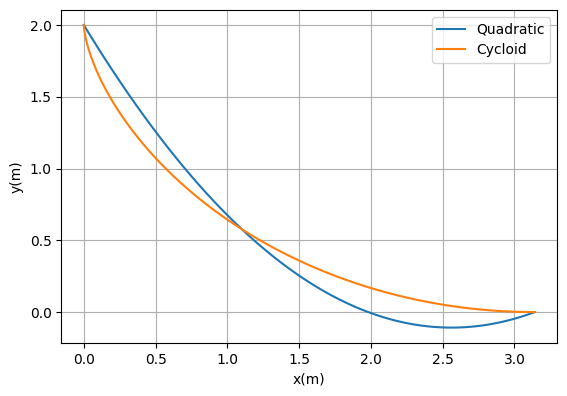

In [ ]:
# Quadratic curve
xq = np.linspace(0, np.pi, 100)
yq = yf(xq, a1opt)

# Cycloid
th = np.linspace(0,np.pi,100)
xc = th - np.sin(th)
yc = 1 + np.cos(th)

plt.axes().set_aspect(1)
plt.grid()
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.plot(xq, yq, label="Quadratic")
plt.plot(xc, yc, label="Cycloid")
plt.legend()

### <*> Simulated Annealing (random walk) 또는, 시행착오(trial and error) [참고: Metropolis algorithm]
구간 $x \in [a,\ b]$ 에서 $y = g(x)$인 곡선을 이산적으로 나타내어
$x_k \in [a,\ b],\ (k=0,\dots,n)$에 대해 $y_k=g(x_k)$가 초기 값으로 주어졌다고 하자. $k$와 $k+1$번째 점들 사이의 구간을  $k$번째 구간이라 하면, 구간 길이는

$$ \Delta s_k = \sqrt{\Delta x_k ^2 + \Delta y_k ^2} $$

이고, 평균 속력은 각각의 구간을 직선 구간으로 간주하면 각각의 구간에서는 등가속도 운동을 한다고 생각할 수 있으므로 평균속력

$$ \bar v_k = \frac{\sqrt{2g(2-y_k)} + \sqrt{2g(2-y_{k+1}})}{2} $$

으로 운동한다고 할 수 있다.

그러면 구간을 통과하는 시간은 근사적으로

$$ t_k = \frac{\Delta s_k}{\bar v_k} $$
라 할 수 있다.

그러면 전체 낙하 시간은

$$t = \sum_{k=0}^{n-1} t_k$$

이다. 여기서 $y_k\ (k = 1, \dots, n-1)$를 랜덤하게 조금씩 변화시켜가며, 새로운 낙하시간이 기존의 낙하시간보다 짧으면 새로운 $y_k$값을 채택하여 경로를 갱신하고 그렇지 않으면 원래의 값으로 되돌린다.

이런 과정을 여러 번 되풀이하면 경로의 모양은 가장 짧은 시간이 걸리는 경로의 모양에 가까와질 것으로 기대할 수 있다.

In [ ]:
#시작점과 끝점의 좌표
xa, xb = 0, np.pi
ya, yb = 2, 0

n = 50
#경로를 직선으로 초기화
xs = np.linspace(xa, xb, n+1)
ys = np.linspace(ya, yb, n+1)

In [ ]:
g = 9.8                    # 중력 가속도
Dxs = np.diff(xs)          # dx : x의 차분 값
Dxs2 = Dxs**2              # dx 의 제곱

In [ ]:
def get_time(ys):
  global g, ya, Dxs2
  Dys = np.diff(ys)             # Δy
  Dss = np.sqrt(Dxs**2 + Dys**2)  # Δs
  Vs = np.sqrt(2 * g * (ya - ys)) # 높이 yk 에서의 속력
  Vks = (Vs[:-1] + Vs[1:]) / 2  # k번째 구간의 평균 속력
  Dts = Dss / Vks               # 구간 통과 시간
  return Dts.sum()              # 전체 낙하 시간

In [ ]:
T = get_time(ys)
T

1.1896494253405914

In [ ]:
def shake(ys):
  global Trw, ya, R, xs
  ysvar = np.copy(ys)
  Tv = Trw
  success = 0
  for i in range(N):                 # N : 한 번의 "흔들기" 마다 시도 횟수
    k = np.random.randint(1, n)      # k∈ [1... n-1] 번째 yk 하나를 랜덤하게 고른다.
    ysk = ysvar[k]                   # 현재 값을 임시 저장

    # yk를 일정한 범위 안에서 랜덤하게 변화시킨다(variation)
    ysvar[k] = ysvar[k] + 2 * (np.random.rand() - 0.5) * np.sin(xs[k]) * R

    if ysvar[k] > ya:
      ysvar[k] = ysk   # 변화시킨 yk 값이 ya 보다 높으면 변화를 취소한다.
    else:
      Tnew = get_time(ysvar)   # 변화된 경로의 전체 낙하 시간
      if Tnew < Tv:            # 시간이 짧아졌으면 변화된 경로 채택하고 낙하 시간을 갱신
        success += 1
        Tv = Tnew
      else:
        ysvar[k] = ysk       # 시간이 짧아지지 않았으면 변화를 기각

  if success/N < 0.05:        # 최적화에 가까와짐: 변화폭을 줄인다.
    R = R * 0.98
  elif success/N > 0.3:       # 최적화에서 멂: 변화 폭을 늘린다.
    R = R * 1.1

  return Tv, ysvar             # N번의 시도 결과를 반환.


In [ ]:
ysv = np.copy(ys)
Trw = T

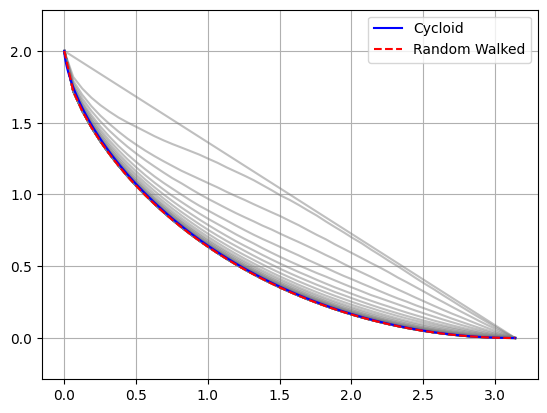

In [ ]:
plt.axis("equal")
plt.grid()

N = n
ind = []
times = []              # 각각의 경로를 따라 낙하하는 시간
R = 5.0                 # 변화 폭
for i in range(50000):
  if R < 1e-6:          # 변화 폭이 매우 작음: 최적화에 가까와진 것으로 판단.
    break
  Tn, ysv = shake(ysv)
  ind.append(i)
  times.append(Tn)
  Trw = Tn
  if i % 500 == 0:
    plt.plot(xs, ysv, c="gray", alpha=0.5)

plt.plot(xc, yc, c='b', label="Cycloid")
plt.plot(xs, ysv, "r--", label="Random Walked")
plt.legend()

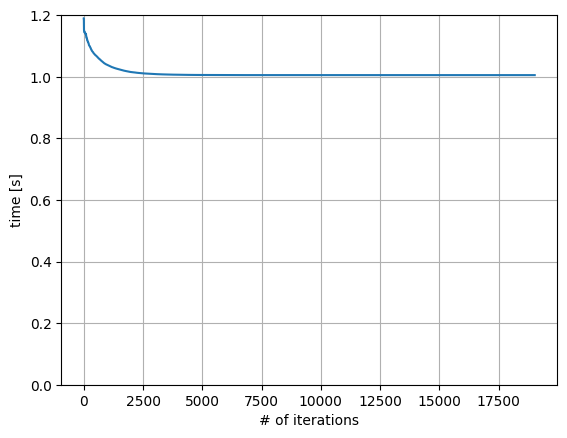

In [ ]:
plt.grid()
plt.ylim([0, 1.2])

plt.xlabel('# of iterations')
plt.ylabel('time [s]')
plt.plot(ind, times)


In [ ]:
R   # 최종 변화 폭 확인

9.91561635828396e-07

In [ ]:
# Random Walk로 구한 경로의 시간
Trw

1.0052036565303253

In [ ]:
# Cycloid
tcyc

1.0035449615772465

In [ ]:
# 최적화된 2차 함수
Topt

1.0319411025538565

In [ ]:
tcyc < Trw < Topt

True